In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
data = pd.read_csv("C:\\Users\\Akanksha Patil\\Downloads\\train.csv")

In [3]:
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [4]:
data = data.drop(columns=['id', 'timestamp','country'])
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [5]:
data = data.dropna()

In [6]:
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [7]:
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [8]:
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [9]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [10]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)


Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


In [12]:
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [13]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2841,-0.639113,0,-0.124220,-0.629556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3753,-1.752409,0,-0.483899,-0.629556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
891,0.252042,0,-0.483899,-0.629556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3649,-1.251296,0,-0.483899,-0.629556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3952,-0.153272,0,-0.027336,-0.629556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,-0.750183,0,2.334753,-0.629556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2952,-0.020337,0,0.020126,-0.629556,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1473,1.755381,1,2.334753,1.194281,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
644,0.252042,1,-0.483899,0.586335,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


Preprocess Test data and get predictions

Compute Mean Abolute Error, Mean Square error for test data

In [15]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:

X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

9084.219738111606 9172.963948517381


Implement Ridge and Lasso Regression and then compute the following metrics on test data

9077.782282356795 9166.55103769262


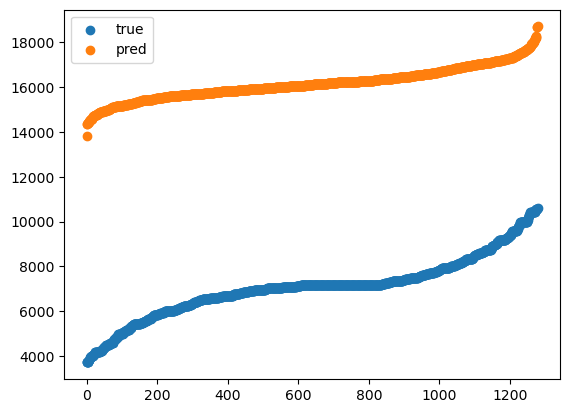

In [17]:
#Q3
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [18]:
ridge.coef_

array([ 189.0025839 ,    6.77170366,  196.67180336,  215.43454497,
         73.34297751,   33.37291306,   -7.08298551,    0.        ,
       1029.91019234,  849.33172336,  667.23907448,  592.47209523,
       1005.88206525,  908.06512422,  146.13295681,  475.32255911,
          0.        ,    0.        ,  349.24857542,  -54.42467223,
        206.92079969,   91.87013302, -196.30228878, -160.23430737])

Trees
Compute errors on test sets

Play with different parameter of decision trees and random forests and see the impact on train and test error

[OPTIONAL] implement cross validation and get best hyperparameters

In [19]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

#evaluating train error
mean_absolute_error(y_train,decisiontree.predict(X_train))

610.7625465850554

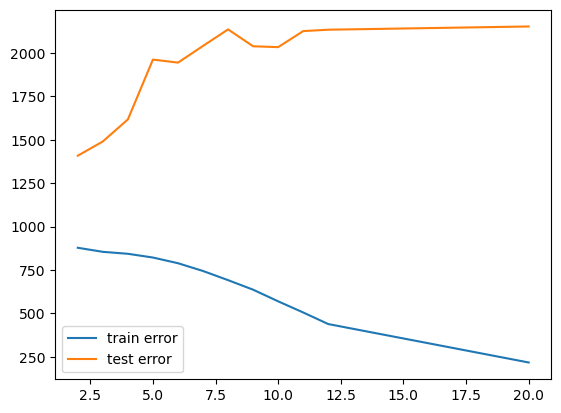

In [20]:
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

In [21]:
# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

390.1583722116594

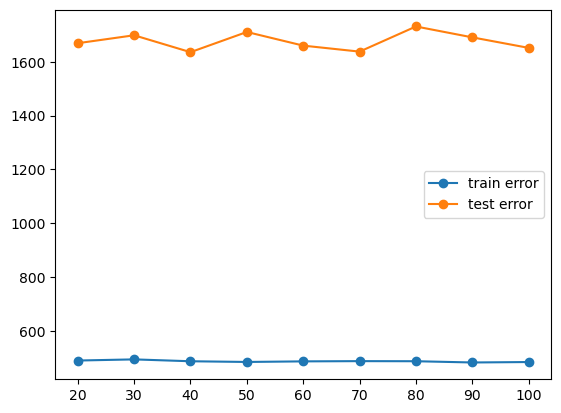

In [22]:
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()

In [23]:
pd.DataFrame({'feature':X_train.columns, "importance":randomf.feature_importances_*100}).sort_values(by='importance', ascending=False)

,feature,importance
0,job_years,25.365454
2,hours_per_week,16.471784
3,telecommute_days_per_week,9.474578
4,certifications,7.031305
23,is_education_computer_related_Yes,6.125596
1,is_manager,5.041554
9,job_title_DBA,4.770109
18,education_Bachelors (4 years),4.537235
11,job_title_Developer,3.568431
20,education_Masters,3.277072
